### Importing data

In [ ]:
!pip install simple-colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import opendatasets as od
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
from sklearn import preprocessing
from datetime import datetime
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from simple_colors import *

In [ ]:
od.download("https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma")
os.chdir('/content/uber-and-lyft-dataset-boston-ma')
uber_df = pd.read_csv("rideshare_kaggle.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: blakeandersonw
Your Kaggle Key: ··········


100%|██████████| 44.5M/44.5M [00:03<00:00, 14.8MB/s]


**username:** blakeandersonw

**key:** 5c7b7542c5ad7af0d6015b98bfa868b4

### Data Preparation

In [ ]:
uber_df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [ ]:
le = preprocessing.LabelEncoder() #label encode categorical variables
uber_df['id']= le.fit_transform(uber_df['id']) 
uber_df['datetime']= le.fit_transform(uber_df['datetime']) 
uber_df['timezone']= le.fit_transform(uber_df['timezone'])
uber_df['destination']= le.fit_transform(uber_df['destination']) 
uber_df['product_id']= le.fit_transform(uber_df['product_id'])
uber_df['short_summary']= le.fit_transform(uber_df['short_summary'])
uber_df['long_summary']= le.fit_transform(uber_df['long_summary'])
uber_df['icon']= le.fit_transform(uber_df['icon'])
uber_df['name']= le.fit_transform(uber_df['name'])
print(blue('Name', 'bold'))
for i, j in enumerate(le.classes_):
    print(j, ":", i)
uber_df['source']= le.fit_transform(uber_df['source'])
print(blue('Source/Destination', 'bold'))
for i, j in enumerate(le.classes_):
    print(j, ":", i)
uber_df['cab_type']= le.fit_transform(uber_df['cab_type'])
print(blue('Type', 'bold'))
for i, j in enumerate(le.classes_):
    print(j, ":", i)

Name
Black : 0
Black SUV : 1
Lux : 2
Lux Black : 3
Lux Black XL : 4
Lyft : 5
Lyft XL : 6
Shared : 7
Taxi : 8
UberPool : 9
UberX : 10
UberXL : 11
WAV : 12
Source/Destination
Back Bay : 0
Beacon Hill : 1
Boston University : 2
Fenway : 3
Financial District : 4
Haymarket Square : 5
North End : 6
North Station : 7
Northeastern University : 8
South Station : 9
Theatre District : 10
West End : 11
Type
Lyft : 0
Uber : 1


In [ ]:
uber_df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,179271,1.544953e+09,9,16,12,25351,0,5,7,0,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,205021,1.543284e+09,2,27,11,961,0,5,7,0,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,411506,1.543367e+09,1,28,11,2534,0,5,7,0,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,527263,1.543554e+09,4,30,11,6988,0,5,7,0,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,606526,1.543463e+09,3,29,11,4400,0,5,7,0,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
uber_df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
uber_df.dropna(axis = 0 , inplace = True) #drop null values

In [ ]:
uber_df['surge_multiplier']= le.fit_transform(uber_df['surge_multiplier']) #map surge multiplier
print(blue('Surge Multiplier', 'bold'))
for i, j in enumerate(le.classes_):
    print(j, ":", i)

Surge Multiplier
0 : 0
1 : 1
2 : 2
3 : 3
4 : 4
5 : 5
6 : 6


### Training

In [ ]:
X = uber_df.drop('price', axis = 1)
y = uber_df['price']

In [ ]:
rfe = RFE(estimator=LinearRegression(),n_features_to_select=30) #Regressive feature elimination to determine significant variables
rfe = rfe.fit(X, y)

In [ ]:
ranking = pd.DataFrame(X.columns[rfe.support_])
ranking

,0
0,day
1,month
2,source
3,destination
4,cab_type
5,product_id
6,name
7,distance
8,surge_multiplier
9,latitude


In [ ]:
uber_clean = X[X.columns[rfe.support_]] #new dataset based on significant variables

In [ ]:
uber_clean.drop(uber_clean.columns.difference(['day','month','source','destination','cab_type','name','surge_multiplier']), 1, inplace=True)

<ipython-input-19-ebc08f8dc825>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  uber_clean.drop(uber_clean.columns.difference(['day','month','source','destination','cab_type','name','surge_multiplier']), 1, inplace=True)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
uber_clean.head()

,day,month,source,destination,cab_type,name,surge_multiplier
0,16,12,5,7,0,7,0
1,27,11,5,7,0,2,0
2,28,11,5,7,0,5,0
3,30,11,5,7,0,4,0
4,29,11,5,7,0,6,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(uber_clean, y, test_size = 0.25) #train data

### Regression Testing

In [ ]:
uber_clean.head()

,day,month,source,destination,cab_type,name,surge_multiplier
0,16,12,5,7,0,7,0
1,27,11,5,7,0,2,0
2,28,11,5,7,0,5,0
3,30,11,5,7,0,4,0
4,29,11,5,7,0,6,0


In [ ]:
y.head()

0     5.0
1    11.0
2     7.0
3    26.0
4     9.0
Name: price, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(uber_clean, y, test_size = 0.25)

####Linear regression

In [ ]:
linear = LinearRegression()
linear.fit(x_train, y_train)
linear.score(x_test, y_test)

0.39975059948557434

####Random Forest Regressor

In [ ]:
random = RandomForestRegressor(n_estimators = 100, random_state = 8) 
random.fit(x_train , y_train)  
random.score(x_test, y_test)

0.9578100314389337

####Bagging Regressor

In [ ]:
bag = BaggingRegressor(KNeighborsRegressor())
bag.fit(x_train, y_train)
bag.score(x_test, y_test)

0.9450361130484161

####Decision Tree Regressor

In [ ]:
decision = DecisionTreeRegressor(random_state = 8)  
decision.fit(x_train , y_train) 
decision.score(x_test, y_test)

0.9569341954906877

####Gradient Boosting Regressor

In [ ]:
gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = 8)
gbr.fit(x_train, y_train)
gbr.score(x_test, y_test)

0.9591505677916428

####Ada Boost Regressor

In [ ]:
ada = AdaBoostRegressor(n_estimators=10)
ada.fit(x_train, y_train)
ada.score(x_test, y_test)

0.7151796018738554

### Plotting

#### Linear regression

In [ ]:
predictionlr = linear.predict(x_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


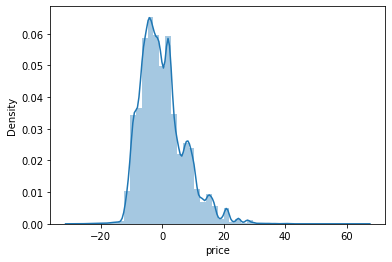

In [ ]:
sns.distplot(y_test - predictionlr)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Price')

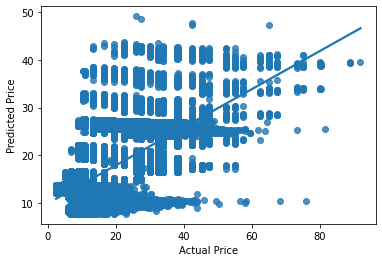

In [ ]:
sns.regplot(y_test,predictionlr)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

#### Random Forest

In [ ]:
predictionrf = random.predict(x_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


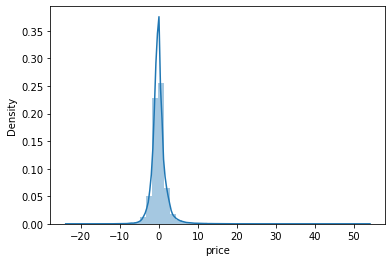

In [ ]:
sns.distplot(y_test - predictionrf)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Price')

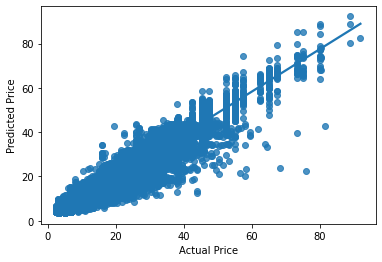

In [ ]:
sns.regplot(y_test,predictionrf)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

#### Gradient Boosting

In [ ]:
predictiongb = gbr.predict(x_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


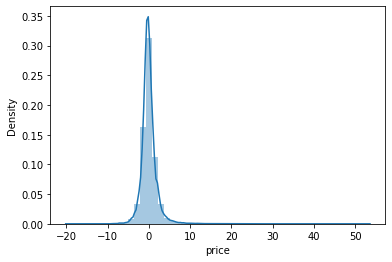

In [ ]:
sns.distplot(y_test - predictiongb)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Price')

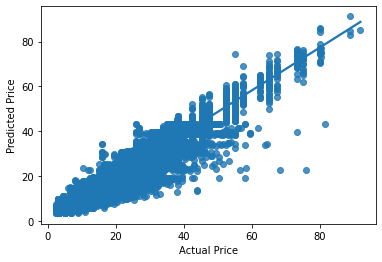

In [ ]:
sns.regplot(y_test,predictiongb)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

### Price prediction function

In [ ]:
pred = GradientBoostingRegressor(n_estimators = 400, max_depth = 8) #using gradient boosting for price prediction function
pred.fit(x_train.values, y_train.values)

GradientBoostingRegressor(max_depth=8, n_estimators=400)

In [ ]:
def pricepredictor(lst): #return predicted price based on regression
    return pred.predict([lst])[0]

In [ ]:
y_pred = pred.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [ ]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred}) #actual vs predicted price
df

,Actual,Predicted
403502,11.5,11.437071
612017,10.5,11.741211
171778,30.5,28.389265
332517,13.0,12.979427
311469,16.5,17.012500
...,...,...
107129,19.5,20.660125
231731,8.5,9.156474
276764,13.5,11.728985
207004,38.5,36.151941


### Entries
**Day**
1-30

**Month**

November : 11

December 12

**Source/Destination**

Back Bay : 0

Beacon Hill : 1

Boston University : 2

Fenway : 3

Financial District : 4

Haymarket Square : 5

North End : 6

North Station : 7

Northeastern University : 8

South Station : 9

Theatre District : 10

West End : 11

**Type**

Lyft : 0

Uber : 1

**Name**

Black : 0

Black SUV : 1

Lux : 2

Lux Black : 3

Lux Black XL : 4

Lyft : 5

Lyft XL : 6

Shared : 7


UberPool : 8

UberX : 9

UberXL : 10

WAV : 11

**Surge Multiplier**

1.0 : 0

1.25 : 1

1.5 : 2

1.75 : 3

2.0 : 4

2.5 : 5

3.0 : 6




### Input

In [ ]:
def get_inputs(): #get user inputs for price prediction
  feats = ["day", "month", "source", "destination", "cab_type", "name", "surge_multiplier"]
  vals = []
  for i, j in enumerate(feats):
    a = input("Enter " + j + ": ")
    vals.append(int(a))
  print(" ")
  print("Predicted price: ")
  return(pricepredictor(vals))

In [ ]:
get_inputs() #run this cell for price prediction

Enter day: Monday


ValueError: ignored